<a href="https://colab.research.google.com/github/Elakkiyasivadevan/Machine-Learning-Tasks/blob/main/LAB/ML_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn

In [ ]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data=pd.read_csv('diabetes.csv', header=None, names=col_names)
print(data.shape)
data.head()

(769, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [ ]:
feature_cols=['pregnant','glucose','bp','insulin','bmi','pedigree','age']
x=data[feature_cols].iloc[1:].astype(float)
y=data.label.iloc[1:].astype(float)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',random_state=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('y_pred:',y_pred)

y_pred: [0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.]


In [ ]:
conf_mat=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score:", Accuracy_score)
print('Accuracy in Percentage:',int(Accuracy_score*100),'%')

Confusion Matrix: [[73 27]
 [21 33]]
Accuracy Score: 0.6883116883116883
Accuracy in Percentage: 68 %


<Axes: xlabel='Predicted', ylabel='Actual'>

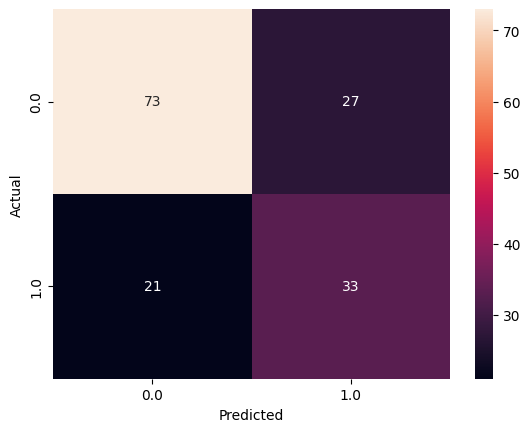

In [ ]:
conf_mat=pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat,annot=True)

1. In a classification tree, the dataset splits according to its variables. In this scenario, you have two variables, age and income, determining whether someone buys a house. If training data tells us that 70 percent of people over age 30 bought a house, then the data gets split there, with age becoming the first node in the tree. This split makes the data 80 percent “pure.” The second node then addresses income from there.

(10, 3)


,age,income,buys_house
0,25,40000,0
1,32,60000,1
2,47,80000,1
3,51,90000,1
4,62,120000,1


age           0
income        0
buys_house    0
dtype: int64


(8, 2)

(8,)

(2, 2)

(2,)

y_pred: [1 0]
Confusion Matrix: [[1 0]
 [0 1]]
Accuracy Score: 1.0
Accuracy in Percentage: 100 %


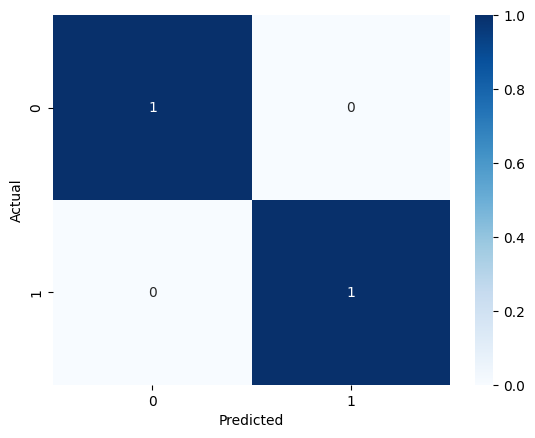

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

col_names = ['age', 'income', 'buys_house']

data = pd.DataFrame({
    'age': [25, 32, 47, 51, 62, 23, 43, 36, 52, 48],
    'income': [40000, 60000, 80000, 90000, 120000, 35000, 75000, 62000, 110000, 85000],
    'buys_house': [0,1,1,1,1,0,1,0,1,1]   # 1 = Yes, 0 = No
})

print(data.shape)
display(data.head())

print(data.isnull().sum())

feature_cols = ['age','income']
x = data[feature_cols]
y = data['buys_house']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

model = DecisionTreeClassifier(criterion='entropy', random_state=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("y_pred:", y_pred)

conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_mat)

Accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score:", Accuracy_score)
print("Accuracy in Percentage:", int(Accuracy_score*100), "%")

conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, cmap="Blues", fmt='d')
plt.show()


2. What you do after work in your free time can depend on the weather. If it is sunny, you might choose to picnic with a friend, grab a drink with a colleague, or run errands. If it is raining, you might stay home and watch a movie instead. In this scenario, you have a clear outcome. In this case, that is classified as whether to “go out” or “stay in.”

(10, 2)


,weather,activity
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0


weather     0
activity    0
dtype: int64


(8, 1)

(8,)

(2, 1)

(2,)

y_pred: [0 1]
Confusion Matrix: [[1 0]
 [0 1]]
Accuracy Score: 1.0
Accuracy in Percentage: 100 %


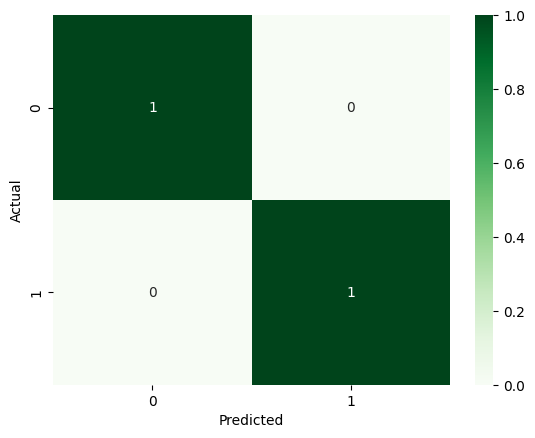

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

col_names = ['weather', 'activity']


data = pd.DataFrame({
    'weather': [1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
    'activity': [1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
})

print(data.shape)
display(data.head())

print(data.isnull().sum())


x = data[['weather']]
y = data['activity']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


model = DecisionTreeClassifier(criterion='entropy', random_state=5)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
print("y_pred:", y_pred)


conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_mat)

Accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score:", Accuracy_score)
print("Accuracy in Percentage:", int(Accuracy_score*100), "%")

conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, cmap="Greens", fmt='d')
plt.show()
